In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

# Define the time range
hours = np.arange(6*60, 23*60+1) / 60.0

### Sunny day scenario

In [ ]:
# Define events as dictionaries with hour as key and value for financial events
# You may want to add widgets to control these values later if needed
capitale_events = {}
revenu_events = {}
depense_events = {}

## Base Case Scenario

In [ ]:
# Define events as dictionaries with hour as key and value for financial events
# You may want to add widgets to control these values later if needed
capitale_events = {}
revenu_events = {}
depense_events = {}

## Bear Case Scenario

In [ ]:
# Define events as dictionaries with hour as key and value for financial events
# You may want to add widgets to control these values later if needed
capitale_events = {}
revenu_events = {}
depense_events = {}

FloatSlider(value=0.0, description='Capitale Rate:', min=-100.0, step=1.0)

FloatSlider(value=0.0, description='Revenu Rate:', min=-100.0, step=1.0)

FloatSlider(value=0.0, description='Dépense Rate:', min=-100.0, step=1.0)

Button(description='Run Financial Simulation', style=ButtonStyle())

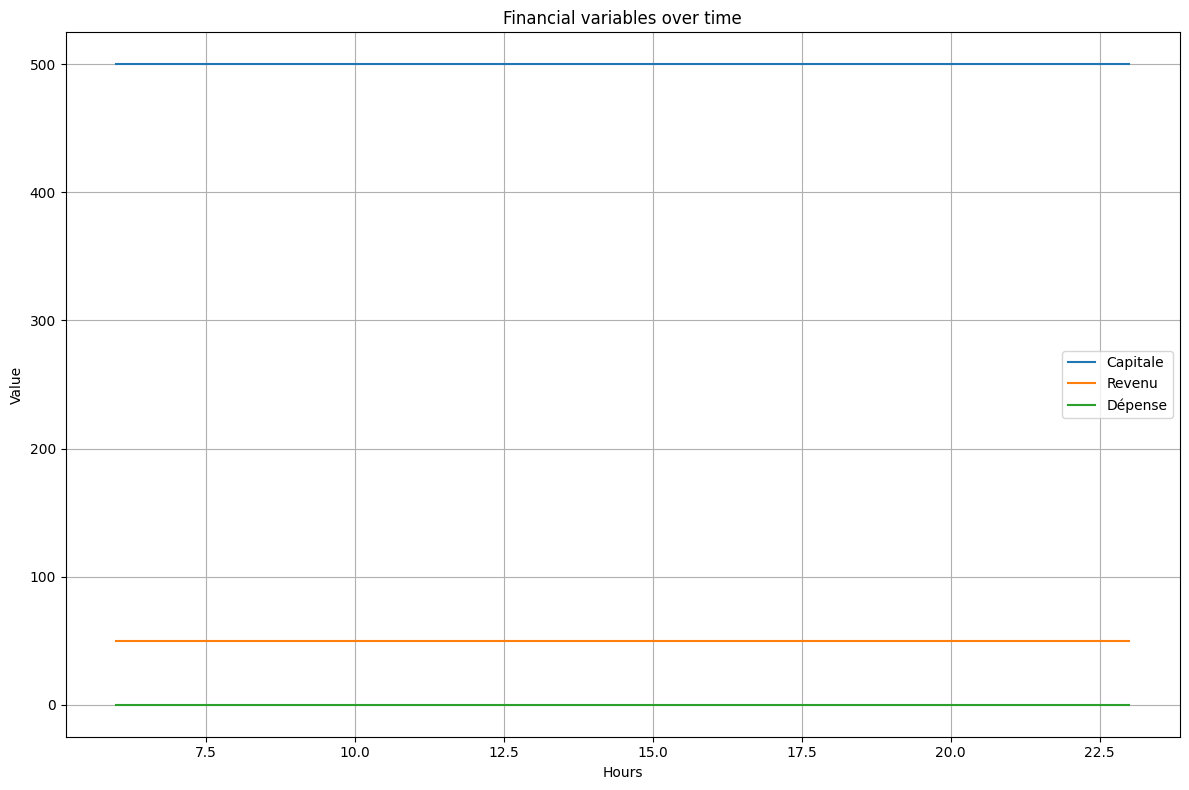

In [ ]:
# Create sliders for financial rates using ipywidgets
capitale_rate_slider = widgets.FloatSlider(value=0/60, min=-100, max=100, step=1, description='Capitale Rate:')
revenu_rate_slider = widgets.FloatSlider(value=10/60, min=-100, max=100, step=1, description='Revenu Rate:')
depense_rate_slider = widgets.FloatSlider(value=-30/60, min=-100, max=100, step=1, description='Dépense Rate:')

# Create a button to run the financial simulation
run_financial_button = widgets.Button(description='Run Financial Simulation')

# Function to update the financial graphs
def run_financial_simulation(b):
    # Update rates with slider values
    capitale_rate = capitale_rate_slider.value
    revenu_rate = revenu_rate_slider.value
    depense_rate = depense_rate_slider.value

    # Initialize starting values for financial variables
    capitale = [500]
    revenu = [50]
    depense = [0]

    # Define a function to get the event amount for a given hour
    def get_financial_event_amount(hour, event_dict):
        return event_dict.get(hour, 0)  # Returns 0 if no event for the given hour

    # Calculate financial values for each hour (with events integrated)
    for i in range(1, len(hours)):
        capitale.append(capitale[i-1] + capitale_rate + get_financial_event_amount(hours[i], capitale_events))
        revenu.append(revenu[i-1] + revenu_rate + get_financial_event_amount(hours[i], revenu_events))
        depense.append(depense[i-1] + depense_rate + get_financial_event_amount(hours[i], depense_events))

    # Plot Financial variables
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.set_title("Financial variables over time")
    ax.plot(hours, capitale, label="Capitale")
    ax.plot(hours, revenu, label="Revenu")
    ax.plot(hours, depense, label="Dépense")
    ax.set_xlabel("Hours")
    ax.set_ylabel("Value")
    ax.legend()
    ax.grid(True)
    
    # Show the plots
    clear_output()
    display(capitale_rate_slider, revenu_rate_slider, depense_rate_slider, run_financial_button)
    plt.tight_layout()
    plt.show()
    

# Bind the button click event to the financial simulation function
run_financial_button.on_click(run_financial_simulation)

# Display the UI components for financial simulation
display(capitale_rate_slider, revenu_rate_slider, depense_rate_slider, run_financial_button)
